In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Heart_Disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df.drop('target', axis=1)
y = df['target']

In [4]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.get_params() # hyperparameters of rfc

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_preds = rfc.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [7]:
rfc.score(X_train, y_train)

1.0

In [8]:
rfc.score(X_test, y_test)

0.8032786885245902

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [10]:
confusion_matrix(y_test, y_preds)

array([[22,  8],
       [ 4, 27]], dtype=int64)

In [11]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [12]:
np.random.seed(42)

for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    print(f'Model accuracy on test set: {rfc.score(X_test, y_test) * 100: .2f}%')
    print()

Trying model with 10 estimators...
Model accuracy on test set:  85.25%

Trying model with 20 estimators...
Model accuracy on test set:  83.61%

Trying model with 30 estimators...
Model accuracy on test set:  83.61%

Trying model with 40 estimators...
Model accuracy on test set:  80.33%

Trying model with 50 estimators...
Model accuracy on test set:  80.33%

Trying model with 60 estimators...
Model accuracy on test set:  83.61%

Trying model with 70 estimators...
Model accuracy on test set:  85.25%

Trying model with 80 estimators...
Model accuracy on test set:  85.25%

Trying model with 90 estimators...
Model accuracy on test set:  80.33%



In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [14]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svc = LinearSVC()
svc.fit(X_train, y_train)

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [15]:
svc.score(X_test, y_test)

0.8688524590163934

In [16]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
rfc.score(X_test, y_test)

0.8524590163934426

In [18]:
y_preds = rfc.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

In [20]:
rfc.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [21]:
rfc.predict(X_test)[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [22]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [23]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
rfc.score(X_train, y_train)

1.0

In [25]:
rfc.score(X_test, y_test)

0.8524590163934426

In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(rfc, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [27]:
np.random.seed(42)

rfc_score = rfc.score(X_test, y_test)
cross_val_score = np.mean(cross_val_score(rfc, X, y, cv=5))

rfc_score, cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [28]:
print(f'Heart Disease Classifier Cross-validated accuracy: {np.mean(cross_val_score) * 100: .2f}%')

Heart Disease Classifier Cross-validated accuracy:  82.48%


In [29]:
from sklearn.metrics import roc_curve

y_probs = rfc.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [30]:
y_probs_positive = y_probs[:, 1]  # only column 1 from every row
y_probs_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [31]:
# calculate fpr, tpr thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

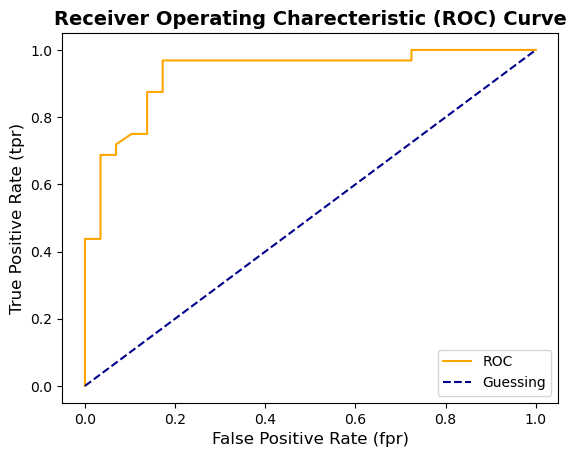

In [32]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    plots a Roc Curve given the false positive rate and true positive rate of a model
    '''
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False Positive Rate (fpr)', fontsize=12)
    plt.ylabel('True Positive Rate (tpr)', fontsize=12)
    plt.title('Receiver Operating Charecteristic (ROC) Curve', fontsize=14, fontweight='bold')
    plt.legend()
    plt.show();

plot_roc_curve(fpr, tpr)

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

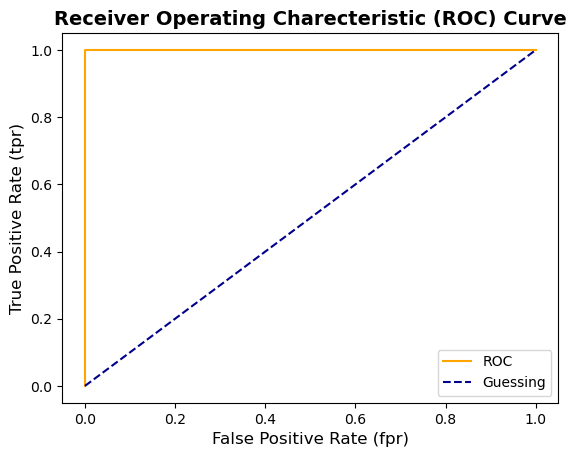

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [35]:
roc_auc_score(y_test, y_test)

1.0

In [36]:
y_preds = rfc.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [37]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [38]:
pd.crosstab(y_test, y_preds, rownames=['Actual labels'], colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


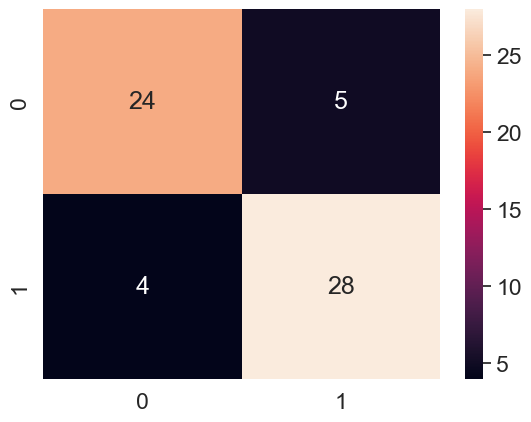

In [39]:
import seaborn as sns
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat, annot=True);

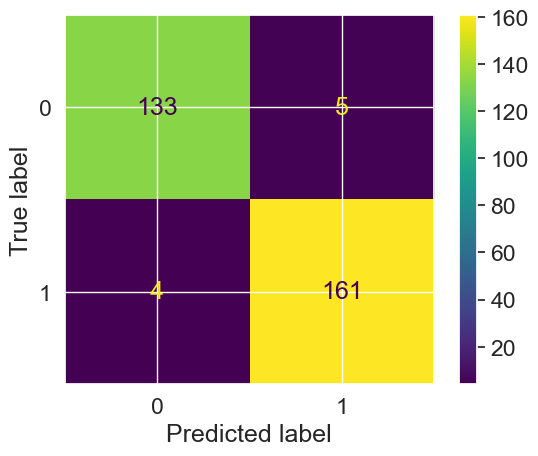

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=rfc, X=X, y=y);

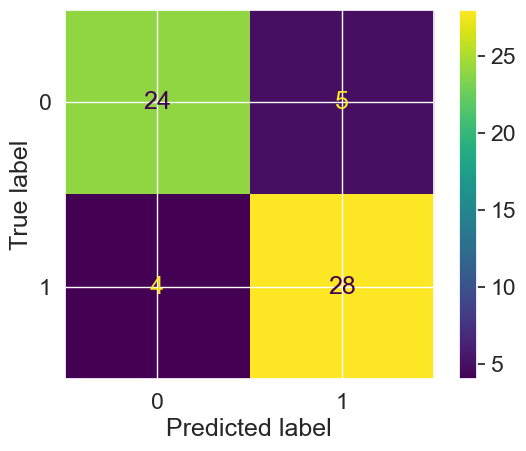

In [41]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Classifier Metrics on the Test set:')
print(f'Accuracy: {accuracy_score(y_test, y_preds) * 100: .2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

Classifier Metrics on the Test set:
Accuracy:  85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [44]:
def evaluate_preds(y_true, y_preds):
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metrics_dict = {'Accuracy': round(accuracy, 2),
                    'Precision': round(precision, 2),
                    'Recall': round(recall, 2),
                    'F1': round(f1, 2)}
    
    print(f'Accuracy: {accuracy * 100: .2f}%')
    print(f'Precision: {precision :.2f}')
    print(f'Recall: {recall : .2f}')
    print(f'F1: {f1 : .2f}')
    
    return metrics_dict

In [45]:
# shuffle the data
df_shuffled = df.sample(frac=1)
df_shuffled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
X = df_shuffled.drop('target', axis=1)
y = df_shuffled['target']

# split data into train, valid, test
train_split = round(0.7 * len(df_shuffled))  # 70% of data
valid_split = round(train_split + 0.15 * len(df_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_preds = rfc.predict(X_valid)

In [49]:
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy:  88.89%
Precision: 0.94
Recall:  0.91
F1:  0.92


{'Accuracy': 0.89, 'Precision': 0.94, 'Recall': 0.91, 'F1': 0.92}

In [61]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train, y_train)
y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy:  88.89%
Precision: 0.94
Recall:  0.91
F1:  0.92


{'Accuracy': 0.89, 'Precision': 0.94, 'Recall': 0.91, 'F1': 0.92}

In [50]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

X = df_shuffled.drop('target', axis=1)
y = df_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1)

rs_clf = RandomizedSearchCV(clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   5.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimator

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\venka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\venka\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\venka\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\venka\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [51]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [52]:
rs_y_preds = rs_clf.predict(X_test)
rs_y_preds

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [53]:
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

Accuracy:  85.25%
Precision: 0.87
Recall:  0.84
F1:  0.86


{'Accuracy': 0.85, 'Precision': 0.87, 'Recall': 0.84, 'F1': 0.86}

In [54]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# np.random.seed(42)

clf = RandomForestClassifier(n_jobs=-1)

grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

gs_clf = GridSearchCV(clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\venka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\venka\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\venka\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\venka\anaconda3\Lib\site-packages\

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [58]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [59]:
gs_y_preds = gs_clf.predict(X_test)
gs_y_preds

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [60]:
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Accuracy:  85.25%
Precision: 0.90
Recall:  0.81
F1:  0.85


{'Accuracy': 0.85, 'Precision': 0.9, 'Recall': 0.81, 'F1': 0.85}

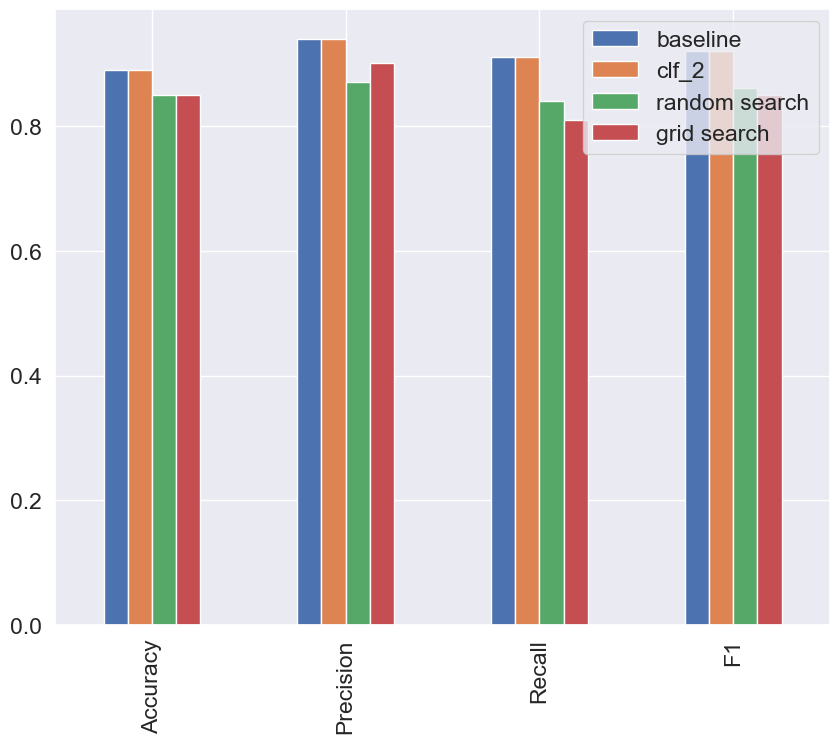

In [63]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'clf_2': clf_2_metrics,
                                'random search': rs_metrics,
                                'grid search': gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

In [64]:
import pickle

pickle.dump(gs_clf, open('gs_random_forest_model.pkl', 'wb'))

In [65]:
loaded_pickle_model = pickle.load(open('gs_random_forest_model.pkl', 'rb'))
loaded_pickle_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [67]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy:  85.25%
Precision: 0.90
Recall:  0.81
F1:  0.85


{'Accuracy': 0.85, 'Precision': 0.9, 'Recall': 0.81, 'F1': 0.85}